<h1>Importation des bibliothèques<h1>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


<h1>Chargement du dataset<h1>

In [67]:
data = pd.read_csv('credit_risk_dataset.csv')

<h1>Aperçu des données<h1>

In [68]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<h1>Statistiques descriptives<h1>
<h5>Cette analyse donne une première idée de la distribution des variables numériques comme l’âge, le revenu ou le montant du prêt.<h5>

In [69]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<h1>Informations générales<h1>
<h5>Cette cellule permet de voir que notre dataset contient 32581 lignes et 12 collones, le type de chaque colonne et d’identifier certaines variables qui contiennent des valeurs manquantes.<h4>

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<h1>Valeurs manquantes<h1>
<h5>Cette analyse permet d’identifier les colonnes problématiques qui nécessiteront un nettoyage ou un traitement spécifique comme la colonne person_emp_length et la colonne loan_int_rate.<h5>

In [71]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<h1>Exploration des variables catégorielles<h1>
<h5>Cette cellule affichent les différentes modalités des variables catégorielles, ce qui aide à comprendre le comportement des emprunteurs lors de l'encodage des donnees.<h5>

In [72]:
print('les differentes valeurs que peuvent prendre la colonne loan_intent')
print(data['loan_intent'].unique())

print('')
print('les differentes valeurs que peuvent prendre la colonne person_home_ownership')
print(data['person_home_ownership'].unique())

print('')
print('les differentes valeurs que peuvent prendre la colonne loan_grade')
print(data['loan_grade'].unique())

print('')
print('les differentes valeurs que peuvent prendre la colonne cb_person_default_on_file')
print(data['cb_person_default_on_file'].unique())

les differentes valeurs que peuvent prendre la colonne loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

les differentes valeurs que peuvent prendre la colonne person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

les differentes valeurs que peuvent prendre la colonne loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']

les differentes valeurs que peuvent prendre la colonne cb_person_default_on_file
['Y' 'N']


<h1>Matrice de corrélation<h1>
<h5>Cette analyse montre les relations entre les variables numériques et aide à détecter les variables potentiellement importantes comme la Part du revenu annuel consacrée au remboursement, Taux d'Intérêt pour la prédiction du risque de crédit na cause de leur forte taux de correlation avec la cible.<h5>

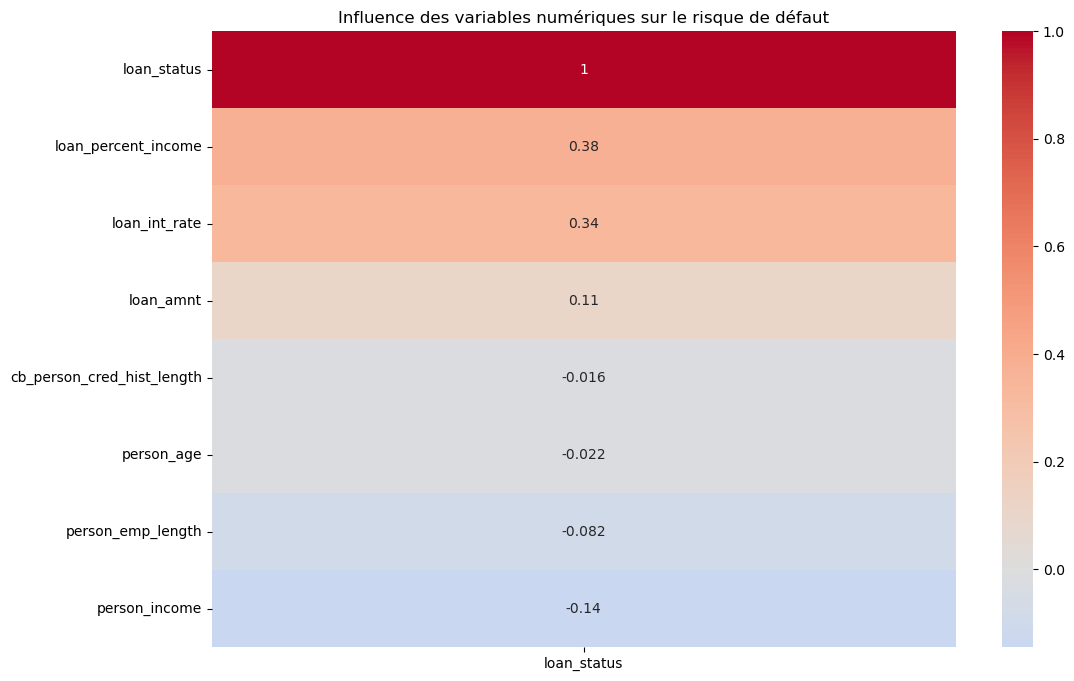

In [73]:
plt.figure(figsize=(12,8))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title("Influence des variables numériques sur le risque de défaut")
plt.show()



<h1># Analyse de l’influence des variables catégorielles sur la variable cible (loan_status)
<h1>
<h5>Cette analyse permet d’identifier des différences de comportement entre les catégories.
On observe que certaines catégories présentent des taux de défaut plus élevés que d’autres.
Cela indique une association entre ces variables catégorielles et le statut du crédit<h5>

In [74]:
housing_influence = data.groupby('person_home_ownership')['loan_status'].mean() * 100
print("\n--- Taux de défaut par type de logement (%) ---")
print(housing_influence.sort_values(ascending=False))

housing_influence = data.groupby('loan_intent')['loan_status'].mean() * 100
print("\n--- Taux de défaut par type de motif du pret (%) ---")
print(housing_influence.sort_values(ascending=False))

housing_influence = data.groupby('cb_person_default_on_file')['loan_status'].mean() * 100
print("\n--- Taux de défaut par Historique de Défaut (%) ---")
print(housing_influence.sort_values(ascending=False))

housing_influence = data.groupby('loan_grade')['loan_status'].mean() * 100
print("\n--- Taux de défaut par classement du risque (%) ---")
print(housing_influence.sort_values(ascending=False))


--- Taux de défaut par type de logement (%) ---
person_home_ownership
RENT        31.569987
OTHER       30.841121
MORTGAGE    12.570663
OWN          7.469040
Name: loan_status, dtype: float64

--- Taux de défaut par type de motif du pret (%) ---
loan_intent
DEBTCONSOLIDATION    28.587874
MEDICAL              26.700708
HOMEIMPROVEMENT      26.102635
PERSONAL             19.887702
EDUCATION            17.216798
VENTURE              14.810282
Name: loan_status, dtype: float64

--- Taux de défaut par Historique de Défaut (%) ---
cb_person_default_on_file
Y    37.806789
N    18.393203
Name: loan_status, dtype: float64

--- Taux de défaut par classement du risque (%) ---
loan_grade
G    98.437500
F    70.539419
E    64.419087
D    59.045780
C    20.733973
B    16.275954
A     9.956389
Name: loan_status, dtype: float64


<h1>Détection des valeurs extrêmes (outliers)<h1>
<h5>Les boxplots montrent que plusieurs variables numériques contiennent des valeurs extrêmes.
On observe particulièrement des outliers pour les revenus (person_income), le montant du prêt (loan_amnt) et le taux d’intérêt (loan_int_rate).
Ces valeurs très élevées ou très faibles peuvent influencer les résultats des modèles et devront être traitées ou prises en compte lors de la phase de modélisation.<h5>

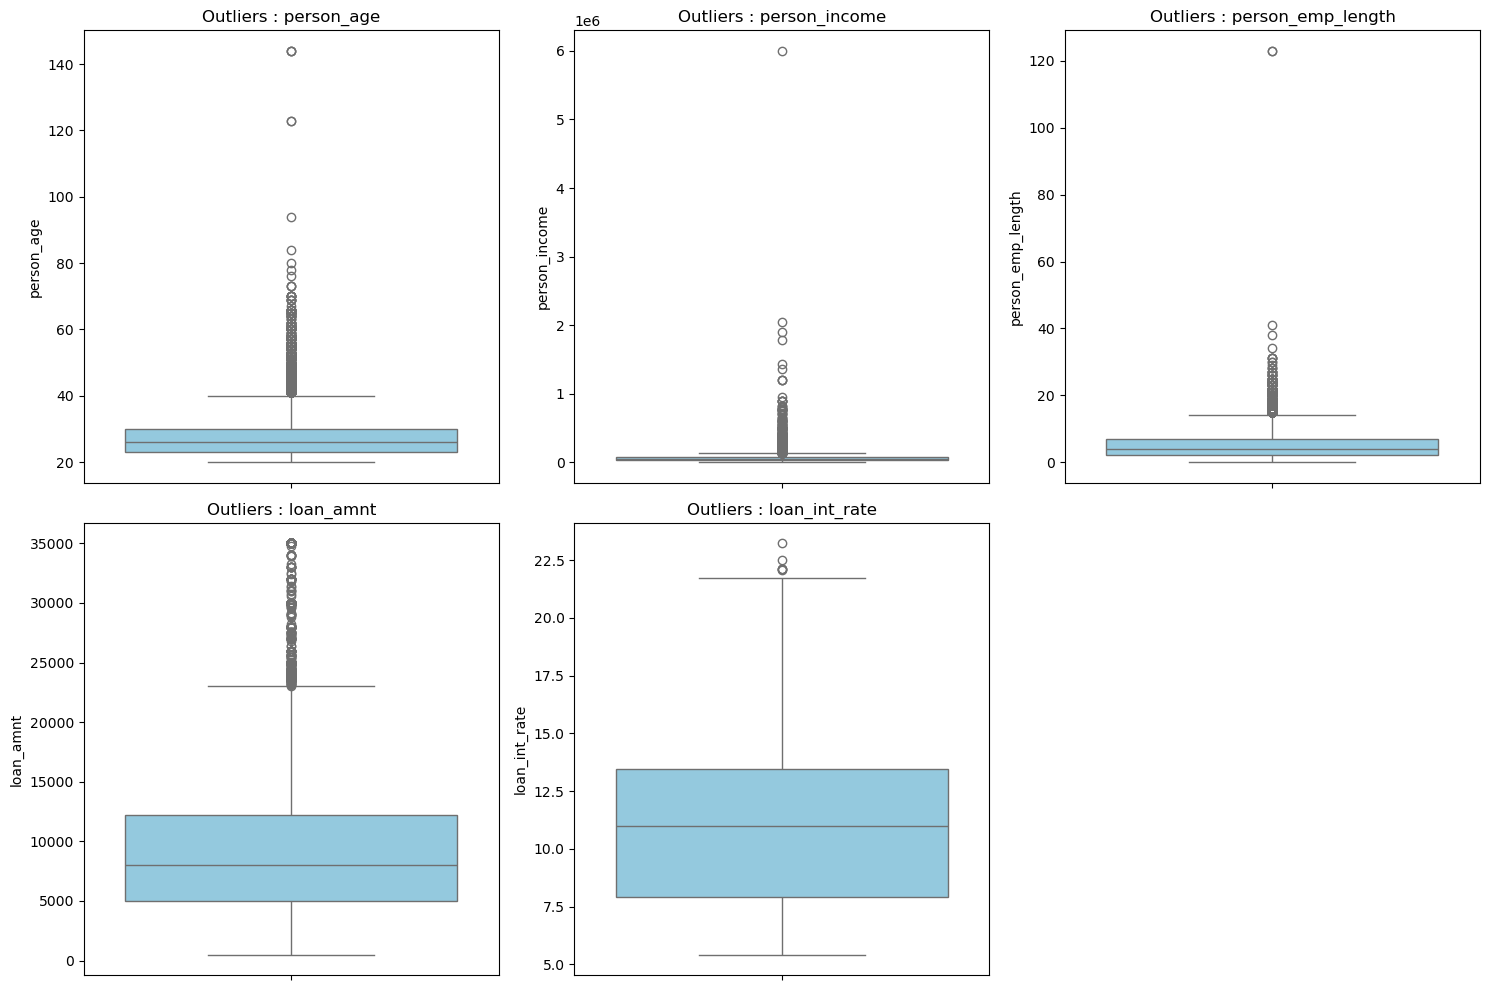

In [75]:
# Liste des colonnes numériques à inspecter
cols_num = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate']

# Création d'une figure avec plusieurs sous-graphiques
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_num):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Outliers : {col}')

plt.tight_layout()
plt.show()

<h1>Montant du prêt selon le statut du crédit<h1>
<h5>Le graphique montre que les clients en défaut (loan_status = 1) ont, en moyenne, des montants de prêt plus élevés que les bons payeurs.
La dispersion des montants est également plus grande chez les clients en défaut, ce qui indique une plus grande variabilité des sommes empruntées dans ce groupe.
Cela suggère que des montants de prêt élevés peuvent être associés à un risque de défaut plus important.<h5>

C:\Users\yandz\AppData\Local\Temp\ipykernel_23812\2137466696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=data, palette='Set2')


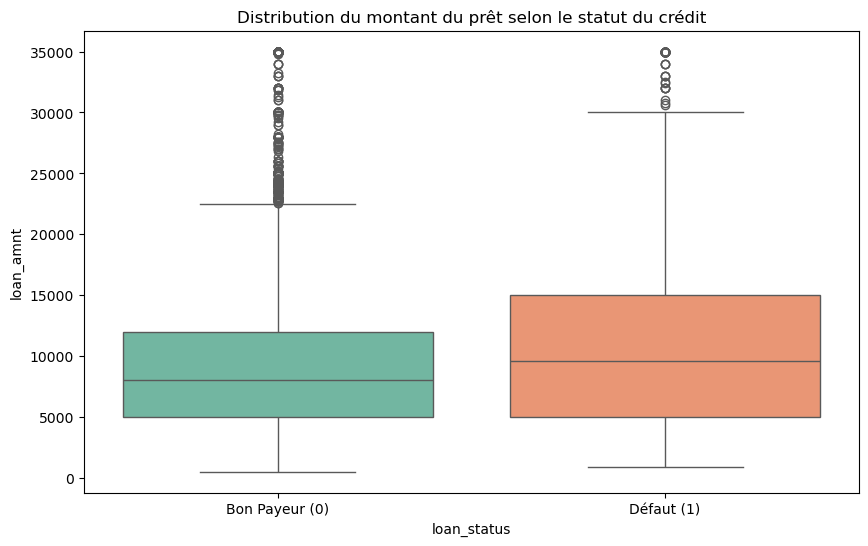

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data, palette='Set2')
plt.title('Distribution du montant du prêt selon le statut du crédit')
plt.xticks([0, 1], ['Bon Payeur (0)', 'Défaut (1)'])
plt.show()

<h1>Vérification de la cohérence des données<h1>
<h5>Cette analyse permet d’identifier des incohérences logiques dans les données.
Certaines lignes présentent une ancienneté professionnelle supérieure à ce qui est possible compte tenu de l’âge de la personne.
De même, quelques clients ont un historique de crédit plus long que leur âge légal.
Ces cas représentent des anomalies dans les données et devront être corrigés ou supprimés pour garantir la qualité du modèle.<h5>

In [77]:
# 1. Cohérence Âge vs Ancienneté d'emploi
# On considère qu'on ne peut pas commencer à travailler avant 14 ans (limite basse généreuse)
incoherence_emploi = data[data['person_emp_length'] > (data['person_age'] - 14)]

# 2. Cohérence Âge vs Historique de Crédit
# On ne peut pas avoir un historique de crédit plus long que son âge - 18 (majorité légale)
incoherence_credit = data[data['cb_person_cred_hist_length'] > (data['person_age'] - 18)]

print(f"Lignes avec emploi incohérent : {len(incoherence_emploi)}")
print(f"Lignes avec historique crédit incohérent : {len(incoherence_credit)}")

# Nettoyage : On ne garde que ce qui est cohérent
data = data[data['person_emp_length'] <= (data['person_age'] - 14)]
data = data[data['cb_person_cred_hist_length'] <= (data['person_age'] - 18)]

Lignes avec emploi incohérent : 2
Lignes avec historique crédit incohérent : 781


<h1>Distribution des variables numériques<h1>
<h5>Les histogrammes montrent que la majorité des variables numériques ne suivent pas une distribution symétrique.
Les revenus et les montants de prêt sont fortement concentrés sur des valeurs basses avec une longue queue vers les valeurs élevées.
Cela indique une distribution asymétrique, typique des données financières, et suggère que des transformations pourront être nécessaires avant la modélisation.<h5>

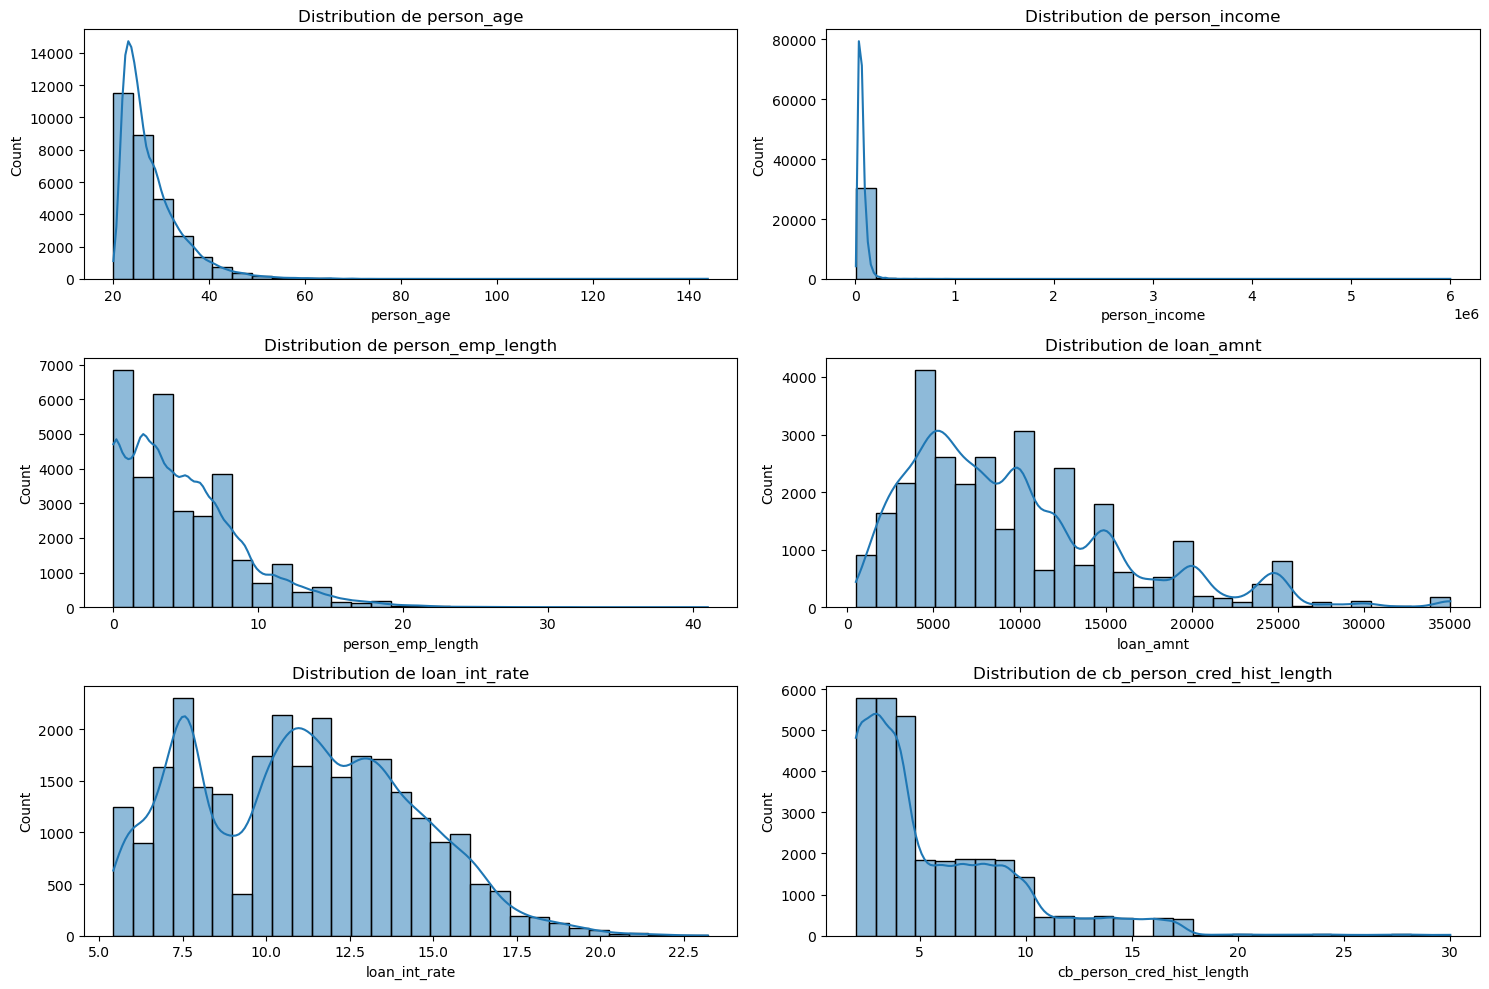

In [78]:
num_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'cb_person_cred_hist_length'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')

plt.tight_layout()
plt.show()


<h1>Confirmation des outliers par boxplots<h1>
<h5>Les boxplots confirment la présence de nombreuses valeurs extrêmes dans les variables financières.
Ces valeurs peuvent représenter des cas réels mais rares, ou des erreurs de saisie.
Leur présence doit être prise en compte, car elles peuvent fortement influencer les modèles statistiques sensibles aux valeurs extrêmes.<h5>

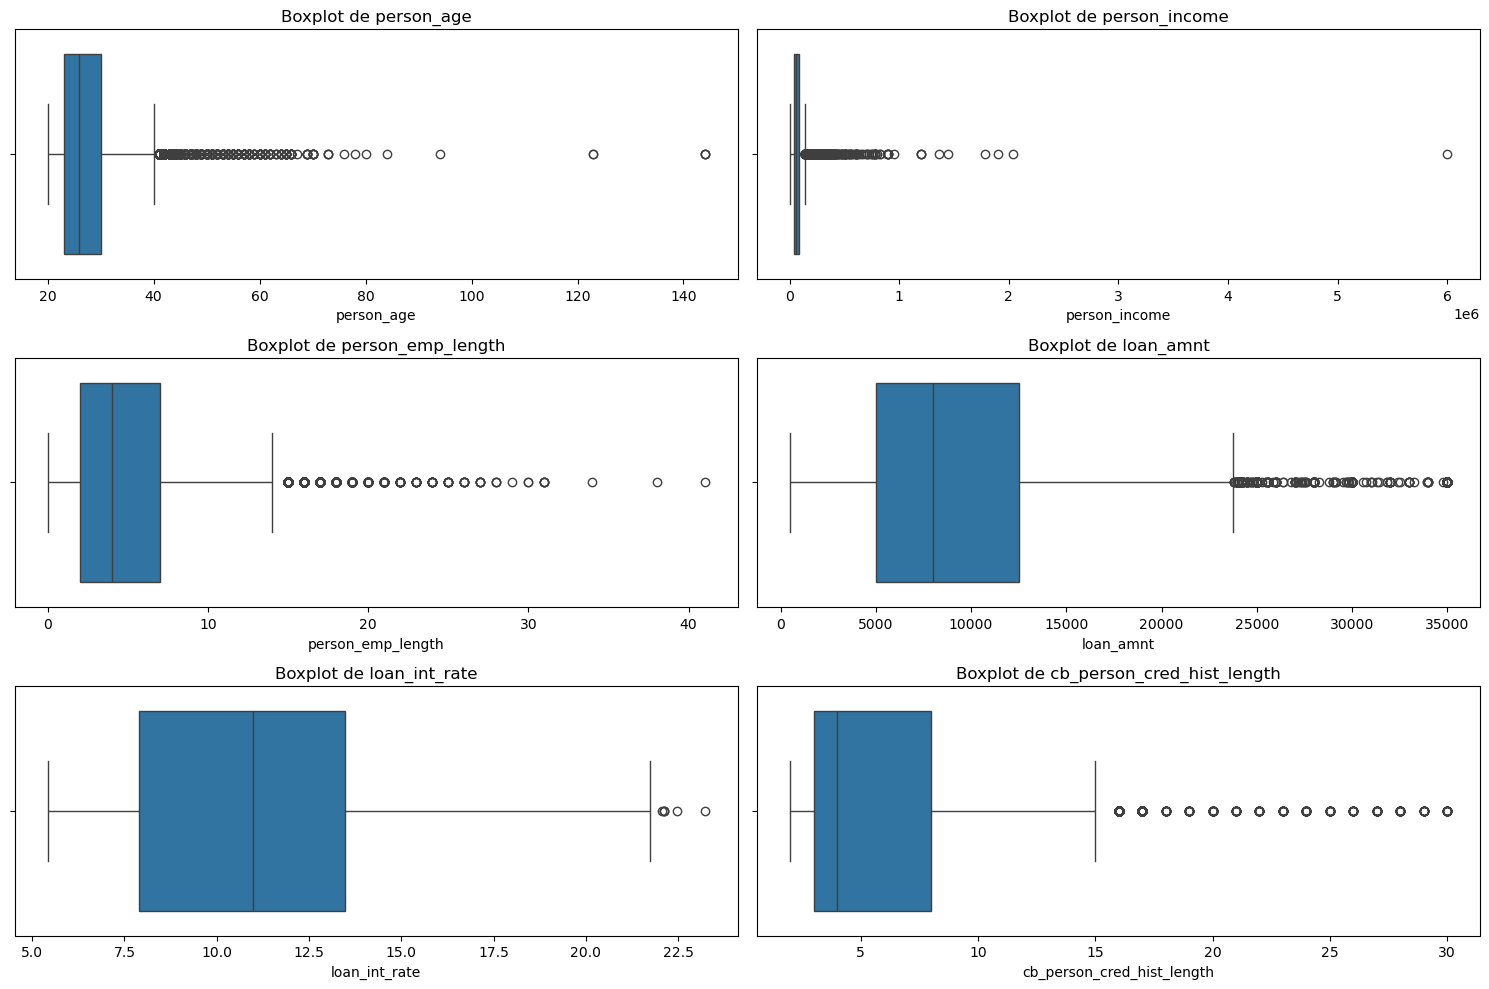

In [79]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


<h1>Relation revenu / montant du prêt<h1>
<h5>Le nuage de points montre qu’en général, plus le revenu est élevé, plus le montant du prêt tend à être élevé.
Cependant, on observe que les clients en défaut sont présents à différents niveaux de revenu.
Cela indique que le revenu seul ne suffit pas à expliquer le défaut de paiement.<h5>

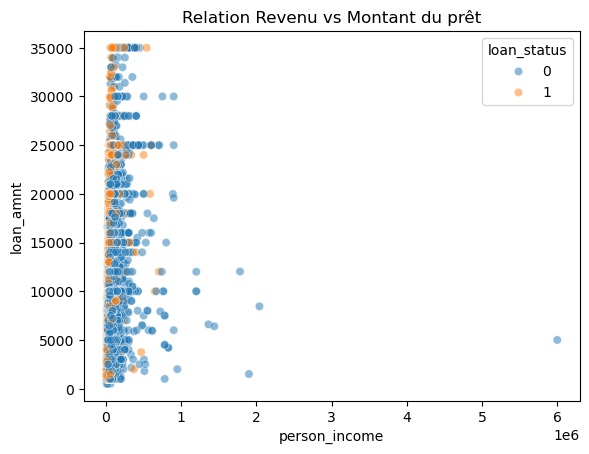

In [80]:
sns.scatterplot(
    x='person_income',
    y='loan_amnt',
    hue='loan_status',
    data=data,
    alpha=0.5
)
plt.title("Relation Revenu vs Montant du prêt")
plt.show()


<h1>Comparaison des variables numériques par statut<h1>
<h5>Les boxplots montrent des différences visibles entre les bons payeurs et les clients en défaut.
Les clients en défaut présentent en moyenne des taux d’intérêt plus élevés et des montants de prêt plus importants.
Ces différences suggèrent que ces variables sont liées au risque de défaut.<h5>

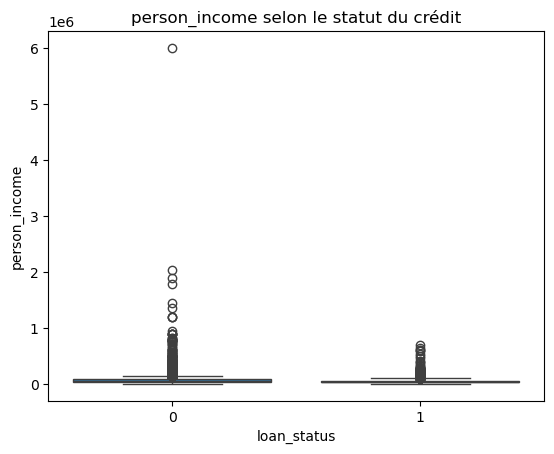

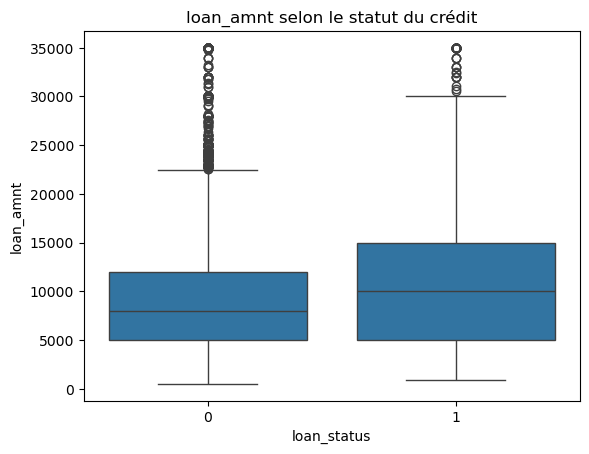

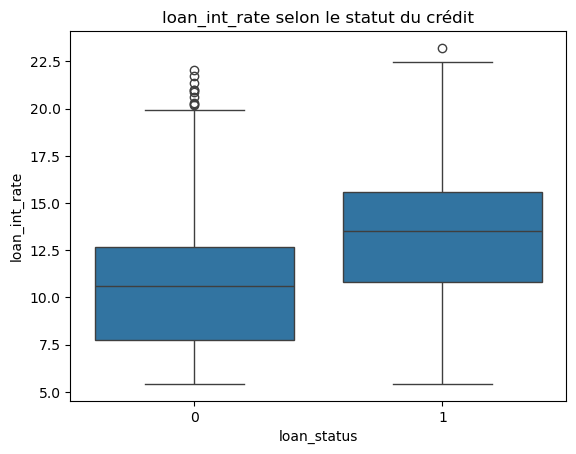

In [81]:
for col in ['person_income', 'loan_amnt', 'loan_int_rate']:
    sns.boxplot(x='loan_status', y=col, data=data)
    plt.title(f'{col} selon le statut du crédit')
    plt.show()


<h1>Relation non linéaire revenu / défaut<h1>
<h5>La courbe de tendance montre que la relation entre le revenu et le défaut n’est pas strictement linéaire.
Le risque de défaut diminue globalement lorsque le revenu augmente, mais cette diminution n’est pas régulière.
Cela justifie l’utilisation de modèles capables de capturer des relations non linéaires.<h5>

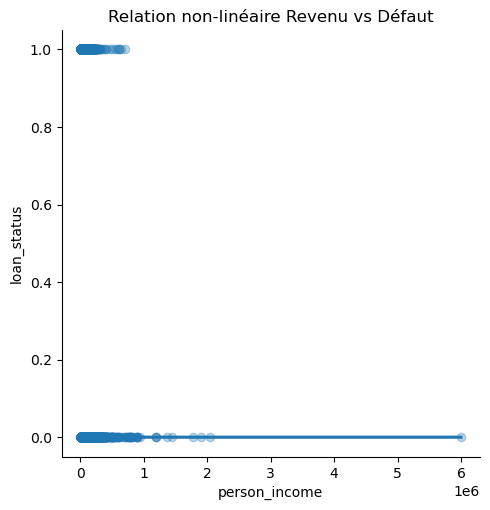

In [82]:
sns.lmplot(
    x='person_income',
    y='loan_status',
    data=data,
    lowess=True,
    scatter_kws={'alpha':0.3}
)
plt.title("Relation non-linéaire Revenu vs Défaut")
plt.show()


<h1>Interaction grade du prêt / logement<h1>
<h5>Les résultats montrent que le taux de défaut varie selon la combinaison du grade du prêt et du type de logement.
Certains grades présentent un risque plus élevé lorsqu’ils sont associés à un type de logement spécifique.
Cela montre que le risque dépend de plusieurs facteurs combinés.<h5>

In [83]:
interaction = data.groupby(
    ['loan_grade', 'person_home_ownership']
)['loan_status'].mean().reset_index()

interaction


,loan_grade,person_home_ownership,loan_status
0,A,MORTGAGE,0.040559
1,A,OTHER,0.120000
2,A,OWN,0.066095
3,A,RENT,0.169524
4,B,MORTGAGE,0.078274
5,B,OTHER,0.156250
6,B,OWN,0.034153
7,B,RENT,0.233837
8,C,MORTGAGE,0.137947
9,C,OTHER,0.375000


<h1>Heatmap des interactions<h1>
<h5>La heatmap met en évidence des zones de risque élevé et faible.
Les couleurs les plus foncées indiquent des combinaisons grade/logement associées à un fort taux de défaut.
Cette visualisation permet d’identifier rapidement les profils les plus risqués.<h5>

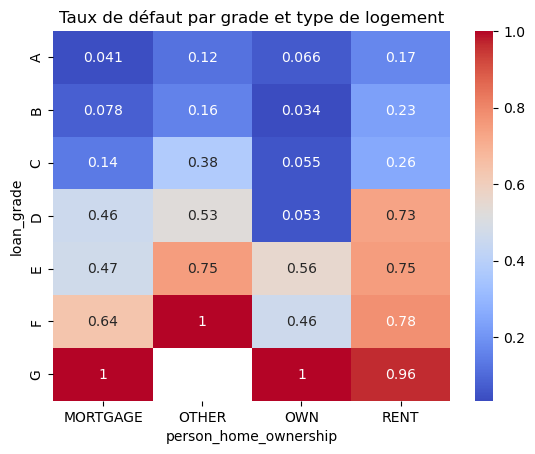

In [84]:
pivot = data.pivot_table(
    values='loan_status',
    index='loan_grade',
    columns='person_home_ownership',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Taux de défaut par grade et type de logement")
plt.show()


<h1>Objectif du prêt et statut<h1>
<h5>Le graphique montre que le taux de défaut varie selon l’objectif du prêt.
Certains types de prêts présentent une proportion plus élevée de défauts.
Cela indique que l’objectif du prêt est une variable pertinente pour l’évaluation du risque.<h5>

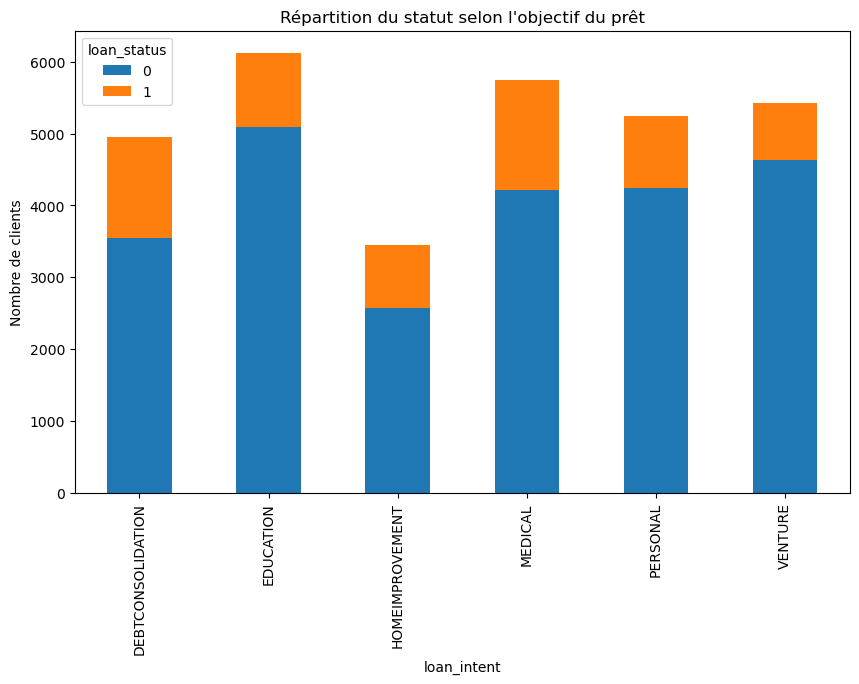

In [85]:
data.groupby(
    ['loan_intent', 'loan_status']
).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))

plt.title("Répartition du statut selon l'objectif du prêt")
plt.ylabel("Nombre de clients")
plt.show()


<h5>L’analyse exploratoire du jeu de données a permis d’identifier plusieurs anomalies et points de vigilance importants.

Tout d’abord, la présence de valeurs manquantes a été observée dans certaines variables, ce qui nécessite un traitement spécifique afin d’éviter toute perte d’information ou biais lors de la modélisation.

Ensuite, l’analyse des distributions et des boxplots a mis en évidence de nombreuses valeurs extrêmes, en particulier dans les variables financières telles que le revenu, le montant du prêt et le taux d’intérêt. Ces valeurs peuvent influencer fortement les résultats des modèles et devront être encadrées ou traitées de manière appropriée.

Des incohérences logiques ont également été détectées, notamment entre l’âge des clients, leur ancienneté professionnelle et la durée de leur historique de crédit. Ces anomalies traduisent des erreurs ou des données non réalistes qui devront être corrigées ou supprimées.

Enfin, l’exploration a montré que plusieurs variables présentent des distributions asymétriques et des relations non linéaires avec le statut du crédit, ce qui devra être pris en compte lors de la préparation des données et du choix des modèles.

L’ensemble de ces observations justifie une phase de nettoyage et de préparation des données rigoureuse, qui portera sur la correction des incohérences, le traitement des valeurs manquantes et des valeurs extrêmes, ainsi que l’adaptation des variables en vue de la modélisation.<h5>

<h1>Suppression des doublons<h1>
<h5>Les doublons représentent des observations identiques répétées plusieurs fois. Leur présence peut fausser les résultats en donnant plus de poids à certains profils de clients.
La suppression est donc la méthode la plus simple et la plus efficace, car elle n’entraîne aucune perte d’information réelle.<h5>

In [86]:

# Suppression des lignes dupliquées pour éviter la sur-représentation de certains clients
data = data.drop_duplicates()

# Vérification
print(f"Nombre de lignes après suppression des doublons : {data.shape[0]}")


Nombre de lignes après suppression des doublons : 30779


<h1>Traitement des valeurs manquantes<h1>
<h5>Toutes les variables n’ont pas la même importance ni la même signification.

Pour les variables numériques, l’imputation par la médiane est privilégiée, car elle est moins sensible aux valeurs extrêmes observées lors de l’exploration.

Pour les variables catégorielles, l’imputation par la modalité la plus fréquente permet de conserver une cohérence avec la majorité des observations.

La suppression systématique des lignes manquantes est évitée afin de ne pas réduire inutilement la taille du jeu de données.<h5>

In [87]:
# Vérification du nombre de valeurs manquantes par variable
data.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2960
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<h1>Imputation des variables numériques (par la médiane)<h1>

In [88]:
# Liste des variables numériques
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Imputation par la médiane (robuste aux valeurs extrêmes)
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())


<h1>Correction des incohérences logiques<h1>
<h5>Les incohérences telles qu’une ancienneté professionnelle supérieure à l’âge du client ou un historique de crédit irréaliste traduisent des erreurs de données.
Ces valeurs ne peuvent pas être corrigées de manière fiable sans information supplémentaire.
La suppression de ces observations est donc privilégiée afin de garantir la cohérence globale du jeu de données.<h5>

In [89]:
# Suppression des lignes incohérentes :
# - ancienneté professionnelle supérieure à l’âge
# - historique de crédit supérieur à l’âge

data = data[
    (data['person_emp_length'] <= data['person_age']) &
    (data['cb_person_cred_hist_length'] <= data['person_age'])
]

print(f"Nombre de lignes après correction des incohérences : {data.shape[0]}")


Nombre de lignes après correction des incohérences : 30779


<h1>Traitement des valeurs extrêmes (plafonnement)<h1>
<h5>Dans un contexte financier, des valeurs élevées peuvent représenter des cas réels (clients très aisés, gros montants de prêt).
Supprimer ces valeurs risquerait d’éliminer des profils importants.
Le plafonnement ou la transformation permet de réduire leur impact sans perdre l’information qu’elles contiennent.<h5>

In [90]:
# Fonction de plafonnement basée sur les quantiles
# Les quantiles 1% et 99% sont choisis pour limiter l’impact
# des valeurs extrêmes tout en conservant les cas rares mais réels

def cap_outliers(df, column):
    q1 = df[column].quantile(0.01)
    q99 = df[column].quantile(0.99)
    df[column] = df[column].clip(q1, q99)

# Variables concernées par les outliers
outlier_cols = [
    'person_income',
    'loan_amnt',
    'loan_int_rate'
]

for col in outlier_cols:
    cap_outliers(data, col)


<h1>Transformation des distributions asymétriques<h1>
<h5>L’analyse exploratoire a montré que plusieurs variables financières sont fortement asymétriques.
Une transformation permet de rendre ces variables plus stables et plus faciles à exploiter par les modèles, tout en conservant les relations sous-jacentes avec la variable cible.<h5>

In [91]:
import numpy as np

# Transformation logarithmique (log(1+x) pour éviter log(0))
skewed_cols = [
    'person_income',
    'loan_amnt'
]

for col in skewed_cols:
    data[col] = np.log1p(data[col])


<h1>Encodage des variables catégorielles<h1>
<h5>Les modèles de machine learning nécessitent des variables numériques.
L’encodage permet de transformer les catégories en valeurs exploitables, sans introduire de hiérarchie artificielle entre les modalités.<h5>

In [92]:
# Encodage one-hot des variables catégorielles
data = pd.get_dummies(data, drop_first=True)


<h1>Vérification finale du jeu de données<h1>

In [93]:
# Vérification finale
print("Valeurs manquantes restantes :")
print(data.isnull().sum().sum())

print("\nAperçu du jeu de données final :")
data.head()


Valeurs manquantes restantes :
0

Aperçu du jeu de données final :


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9.575053,5.0,7.090910,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9.575053,1.0,8.612685,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,11.089821,4.0,10.308986,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,10.904138,8.0,10.308986,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True
5,21,9.575053,2.0,7.824446,7.14,1,0.25,2,False,True,...,False,False,True,False,False,False,False,False,False,False


<h1>Description finale<h1>

In [94]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,30779.000000,30779.000000,30779.000000,30779.000000,30779.000000,30779.000000,30779.000000,30779.000000
mean,27.855128,10.940013,4.804737,8.955646,11.027883,0.215244,0.169442,5.791546
std,6.395994,0.537786,4.058352,0.699784,3.044292,0.410998,0.106192,4.084145
min,20.000000,9.575053,0.000000,7.090910,5.420000,0.000000,0.000000,2.000000
25%,23.000000,10.596560,2.000000,8.517393,8.490000,0.000000,0.090000,3.000000
50%,26.000000,10.933125,4.000000,8.987322,10.990000,0.000000,0.150000,4.000000
75%,30.000000,11.289794,7.000000,9.433564,13.160000,0.000000,0.230000,8.000000
max,144.000000,12.345839,41.000000,10.308986,18.430000,1.000000,0.830000,30.000000


<h1>Séparation train / test<h1>

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
